## FireProtDB - ddG Target Class (Multiclass classification) - Naive Bayes Classifier ##

In [2]:
#Initial setup

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, cross_val_score

print('Setup Complete')

Setup Complete


In [3]:
ddG_df = pd.read_csv('Apr10FireProtDB_FeatGen_targetclass.csv')
ddG_df = ddG_df.dropna()
ddG_df = ddG_df.drop(['protein_name',
                      'uniprot_id',
                      'ddG',
                      'secondary_structure',
                      'sequence',
                      'MEC',
                      'Aliphatic Index'], axis=1)
y = ddG_df['target_class']
X = ddG_df.drop(['target_class'], axis=1)

## Test size 20% ##

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)
print("Gaussian Naive Bayes accuracy: {0:04f}".format(accuracy_score(y_test, y_pred)))
print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Gaussian Naive Bayes accuracy: 0.721286
Training set score: 0.7201
Test set score: 0.7213


## Test size 30% ##

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)
print("Gaussian Naive Bayes accuracy: {0:04f}".format(accuracy_score(y_test, y_pred)))
print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Gaussian Naive Bayes accuracy: 0.717058
Training set score: 0.7204
Test set score: 0.7171


## Gridsearch best parameters ##

In [9]:
param_grid_gnb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]  # Portion of variance added to avoid division by zero
}

In [11]:
grid_search_cv = GridSearchCV(estimator=gnb, param_grid=param_grid_gnb, cv=5, n_jobs=1, verbose=0, scoring='accuracy')

grid_search_cv.fit(X_train, y_train)

best_params = grid_search_cv.best_params_
best_model = grid_search_cv.best_estimator_

print('Best Parameters: ', best_params)
print('Best Model: ', best_model)

best_accuracy = grid_search_cv.best_score_
print(f'Best Cross-Validation Accuracy: {best_accuracy:.2f}')

Best Parameters:  {'var_smoothing': 1e-07}
Best Model:  GaussianNB(var_smoothing=1e-07)
Best Cross-Validation Accuracy: 0.73


## Best parameters ##

In [13]:
gnb_best = GaussianNB(var_smoothing=1e-07)
gnb_best.fit(X_train, y_train)

y_pred = gnb_best.predict(X_test)
print("Gaussian Naive Bayes accuracy: {0:04f}".format(accuracy_score(y_test, y_pred)))
print('Training set score: {:.4f}'.format(gnb_best.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(gnb_best.score(X_test, y_test)))

Gaussian Naive Bayes accuracy: 0.736600
Training set score: 0.7297
Test set score: 0.7366


## Evaluation ##

**Default parameters**

In [18]:
#For 20% test size
from sklearn.metrics import classification_report, confusion_matrix
print("Final classification report:")
print(classification_report(y_test, y_pred))

Final classification report:
              precision    recall  f1-score   support

           0       0.62      0.56      0.59       216
           1       0.78      0.82      0.80       420
           2       0.42      0.29      0.34        17

    accuracy                           0.72       653
   macro avg       0.60      0.56      0.58       653
weighted avg       0.71      0.72      0.72       653



**Best parameters**

In [17]:
#For 20% test size BEST PARAMETERS
from sklearn.metrics import classification_report, confusion_matrix
print("Final classification report:")
print(classification_report(y_test, y_pred))

Final classification report:
              precision    recall  f1-score   support

           0       0.66      0.55      0.60       216
           1       0.77      0.86      0.81       420
           2       0.33      0.18      0.23        17

    accuracy                           0.74       653
   macro avg       0.59      0.53      0.55       653
weighted avg       0.72      0.74      0.73       653



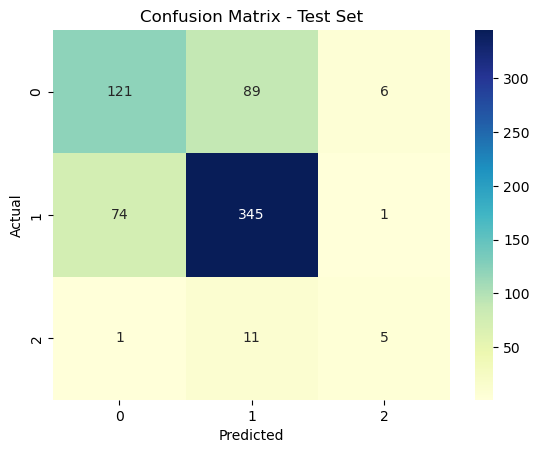

In [22]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='YlGnBu')
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()